## ノイズ耐性2

In [1]:
from ml.nn import *
from datasets.dataset import load_mnist
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot=False)

In [3]:
# rateだけノイズを加える関数
def add_noise(data, rate):
    n_noise = int(data.shape[1] * rate)
    pixel = np.arange(0, data.shape[1], 1)
    for d in data:
        target_pixel = np.random.choice(pixel, n_noise, replace=False)
        for i in target_pixel:
            d[i] = np.random.rand()
    return data

In [4]:
# 25%のノイズを加える
noised_x_train = add_noise(x_train, 0.25)
noised_x_test = add_noise(x_test, 0.25)

#### ニューロン数

In [5]:
input_size = 784
output_size = 10
lr = 0.001
optimizer = 'Adam'

In [6]:
models = []
networks = []
middle_layer_sizes = [25, 50, 75, 100, 125, 150]

In [7]:
for i in range(6):
    middle_layer_size = middle_layer_sizes[i]
    model = Sequential()
    model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
    network = Classifier(model)
    networks.append(network)

In [8]:
networks[0].model

In [9]:
batch_size = 100
epoch = 15
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [10]:
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [11]:
for i in range(6):
    for e in range(epoch):
        acctrain = 0
        losstrain = 0
        randinds = np.random.permutation(n_train)
        for it in range(0, n_train, batch_size):
            ind = randinds[it:it+batch_size]
            x = noised_x_train[ind]
            t = t_train[ind]
            loss, acc = networks[i].update(x, t)
            acctrain += int(acc * batch_size) 
            losstrain += loss
        acctrain /= (1.0 * n_train)
        losstrain /= (n_train // batch_size)

        acctest = 0
        losstest = 0
        for it in range(0, n_test, batch_size):
            x = noised_x_test[it:it+batch_size]
            t = t_test[it:it+batch_size]
            loss, acc = networks[i].predict(x, t)
            acctest += int(acc * batch_size)
            losstest += loss
        acctest /= (1.0 * n_test)
        losstest /= (n_test // batch_size)

    train_loss_list.append(losstrain)
    train_acc_list.append(acctrain)
    test_loss_list.append(losstest)
    test_acc_list.append(acctest)

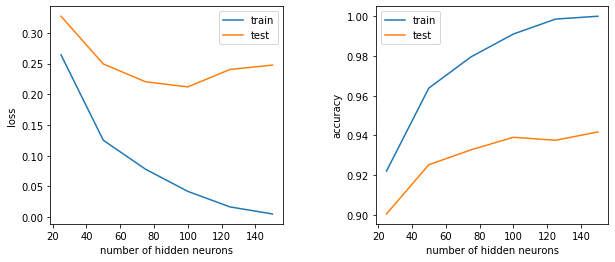

In [13]:
fig = plt.figure(figsize=(10, 4))
loss_graph = fig.add_subplot(1, 2, 1)
acc_graph = fig.add_subplot(1, 2, 2)
loss_graph.set_xlabel('number of hidden neurons')
loss_graph.set_ylabel('loss')
acc_graph.set_xlabel('number of hidden neurons')
acc_graph.set_ylabel('accuracy')

loss_graph.plot(middle_layer_sizes, train_loss_list, label='train')
loss_graph.plot(middle_layer_sizes, test_loss_list, label='test')
loss_graph.legend()

acc_graph.plot(middle_layer_sizes, train_acc_list, label='train')
acc_graph.plot(middle_layer_sizes, test_acc_list, label='test')
acc_graph.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('nn_noise_neuron.png')

#### 学習係数

In [14]:
input_size = 784
output_size = 10
middle_layer_size = 50
optimizer = 'Adam'

In [15]:
models = []
networks = []
lrs = [0.1, 0.01, 0.001, 0.0001, 0.00001]

In [16]:
for i in range(5):
    lr = lrs[i]
    model = Sequential()
    model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
    network = Classifier(model)
    networks.append(network)

In [17]:
batch_size = 100
epoch = 15
n_train = x_train.shape[0]
n_test = x_test.shape[0]
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [18]:
for i in range(5):
    for e in range(epoch):
        acctrain = 0
        losstrain = 0
        randinds = np.random.permutation(n_train)
        for it in range(0, n_train, batch_size):
            ind = randinds[it:it+batch_size]
            x = noised_x_train[ind]
            t = t_train[ind]
            loss, acc = networks[i].update(x, t)
            acctrain += int(acc * batch_size) 
            losstrain += loss
        acctrain /= (1.0 * n_train)
        losstrain /= (n_train // batch_size)

        acctest = 0
        losstest = 0
        for it in range(0, n_test, batch_size):
            x = noised_x_test[it:it+batch_size]
            t = t_test[it:it+batch_size]
            loss, acc = networks[i].predict(x, t)
            acctest += int(acc * batch_size)
            losstest += loss
        acctest /= (1.0 * n_test)
        losstest /= (n_test // batch_size)

    train_loss_list.append(losstrain)
    train_acc_list.append(acctrain)
    test_loss_list.append(losstest)
    test_acc_list.append(acctest)

/home/mech-user/Documents/ml/ml/nn.py:53: UserWarning: The lr value is too big.
  warnings.warn("The lr value is too big.")


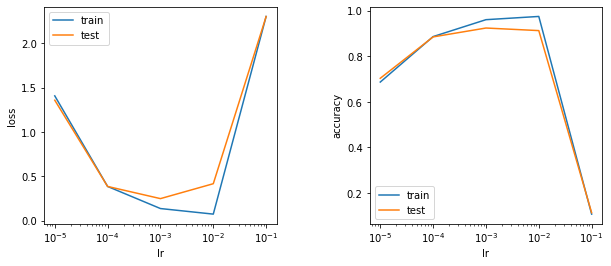

In [19]:
fig = plt.figure(figsize=(10, 4))

loss_graph = fig.add_subplot(1, 2, 1)
acc_graph = fig.add_subplot(1, 2, 2)
loss_graph.set_xlabel('lr')
loss_graph.set_ylabel('loss')
acc_graph.set_xlabel('lr')
acc_graph.set_ylabel('accuracy')

loss_graph.plot(lrs, train_loss_list, label='train')
loss_graph.plot(lrs, test_loss_list, label='test')
loss_graph.set_xscale('log')
loss_graph.legend()

acc_graph.plot(lrs, train_acc_list, label='train')
acc_graph.plot(lrs, test_acc_list, label='test')
acc_graph.set_xscale('log')
acc_graph.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('nn_noise_lr.png')

#### 学習係数対照実験

In [20]:
input_size = 784
output_size = 10
middle_layer_size = 50
optimizer = 'Adam'

In [21]:
models = []
networks = []
lrs = [0.1, 0.01, 0.001, 0.0001, 0.00001]

In [22]:
for i in range(5):
    lr = lrs[i]
    model = Sequential()
    model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
    model.addlayer(ReLU(optimizer=optimizer, lr=lr))
    model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
    network = Classifier(model)
    networks.append(network)

In [23]:
batch_size = 100
epoch = 15
n_train = x_train.shape[0]
n_test = x_test.shape[0]
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [24]:
for i in range(5):
    for e in range(epoch):
        acctrain = 0
        losstrain = 0
        randinds = np.random.permutation(n_train)
        for it in range(0, n_train, batch_size):
            ind = randinds[it:it+batch_size]
            x = x_train[ind]
            t = t_train[ind]
            loss, acc = networks[i].update(x, t)
            acctrain += int(acc * batch_size) 
            losstrain += loss
        acctrain /= (1.0 * n_train)
        losstrain /= (n_train // batch_size)

        acctest = 0
        losstest = 0
        for it in range(0, n_test, batch_size):
            x = x_test[it:it+batch_size]
            t = t_test[it:it+batch_size]
            loss, acc = networks[i].predict(x, t)
            acctest += int(acc * batch_size)
            losstest += loss
        acctest /= (1.0 * n_test)
        losstest /= (n_test // batch_size)

    train_loss_list.append(losstrain)
    train_acc_list.append(acctrain)
    test_loss_list.append(losstest)
    test_acc_list.append(acctest)

/home/mech-user/Documents/ml/ml/nn.py:53: UserWarning: The lr value is too big.
  warnings.warn("The lr value is too big.")


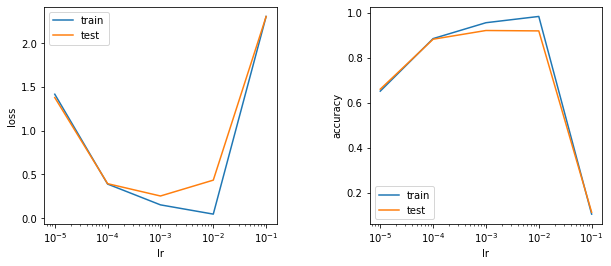

In [25]:
fig = plt.figure(figsize=(10, 4))

loss_graph = fig.add_subplot(1, 2, 1)
acc_graph = fig.add_subplot(1, 2, 2)
loss_graph.set_xlabel('lr')
loss_graph.set_ylabel('loss')
acc_graph.set_xlabel('lr')
acc_graph.set_ylabel('accuracy')

loss_graph.plot(lrs, train_loss_list, label='train')
loss_graph.plot(lrs, test_loss_list, label='test')
loss_graph.set_xscale('log')
loss_graph.legend()

acc_graph.plot(lrs, train_acc_list, label='train')
acc_graph.plot(lrs, test_acc_list, label='test')
acc_graph.set_xscale('log')
acc_graph.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('nn_lr.png')